In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
np.random.seed(42)
# metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import IsolationForest

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
# getting the data
df = pd.read_csv('data/mfeat-morphological_csv.csv')
df.head()

,att1,att2,att3,att4,att5,att6,class
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779,1
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822,1
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435,1
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281,1
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    2000 non-null   float64
 1   att2    2000 non-null   float64
 2   att3    2000 non-null   float64
 3   att4    2000 non-null   float64
 4   att5    2000 non-null   float64
 5   att6    2000 non-null   float64
 6   class   2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB


In [5]:
df.describe()

,att1,att2,att3,att4,att5,att6,class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000
mean,0.492500,1.733500,0.713500,156.418886,1.639569,6155.200435,5.500
std,0.664955,1.141985,0.699759,25.010014,0.291316,3757.634467,2.873
min,0.000000,0.000000,0.000000,99.508861,1.143130,1439.534940,1.000
25%,0.000000,1.000000,0.000000,135.014361,1.363562,3099.331040,3.000
50%,0.000000,2.000000,1.000000,150.063861,1.625846,5255.432237,5.500
75%,1.000000,3.000000,1.000000,175.728861,1.881523,9093.955756,8.000
max,2.000000,6.000000,5.000000,231.276861,2.558830,17572.199943,10.000


**No missing values**

In [6]:
y = df['class']
x = df.iloc[:, :-1]
x.columns

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6'], dtype='object')

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

In [8]:
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(x_train, y_train)
rf.oob_score_

0.708125

In [9]:
rf.score(x_valid, y_valid)

0.7075

In [10]:
rf = RandomForestClassifier(n_estimators=40, max_features=0.5, oob_score=True, n_jobs=-1, random_state=42)
rf.fit(x_train, y_train)
rf.oob_score_

0.690625

In [11]:
rf.score(x_valid, y_valid)

0.715

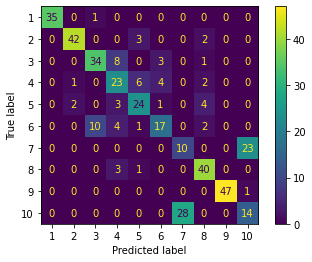

In [12]:
plot_confusion_matrix(rf, x_valid, y_valid);

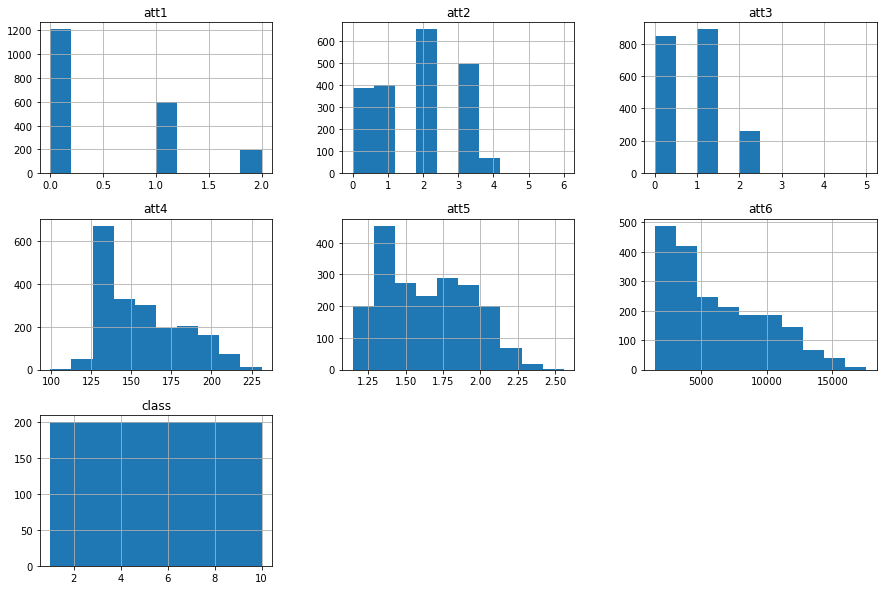

In [13]:
df.hist(figsize=(15, 10));

In [14]:
columns = df.columns.tolist();columns

['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'class']

In [15]:
np.r_[columns[:3], [columns[4]]].tolist()

['att1', 'att2', 'att3', 'att5']

<AxesSubplot:>

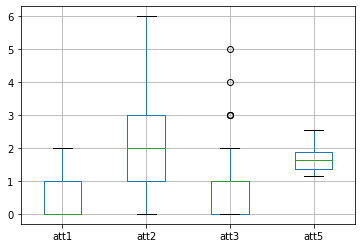

In [16]:
df.boxplot(np.r_[columns[:3], [columns[4]]].tolist())

<AxesSubplot:>

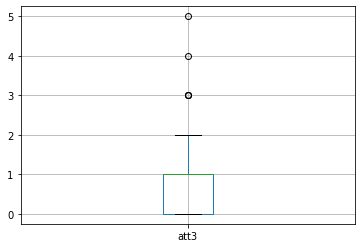

In [17]:
df.boxplot('att3')

In [18]:
df['att3'].value_counts()

1.0    889
0.0    846
2.0    260
3.0      3
5.0      1
4.0      1
Name: att3, dtype: int64

In [19]:
df[ df['att3'] >= 3]

,att1,att2,att3,att4,att5,att6,class
235,0.0,4.0,4.0,155.074861,1.512981,4419.579881,2
327,0.0,3.0,5.0,150.543861,1.601697,4951.456401,2
819,1.0,3.0,3.0,146.863861,1.549377,4952.085367,5
1739,2.0,1.0,3.0,128.668861,1.269088,1728.209448,9
1783,2.0,1.0,3.0,141.726861,1.376182,2574.034752,9


<AxesSubplot:>

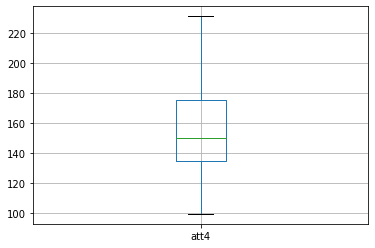

In [20]:
df.boxplot('att4')

<AxesSubplot:>

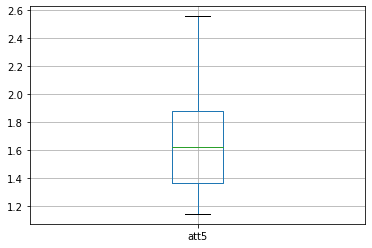

In [21]:
df.boxplot('att5')

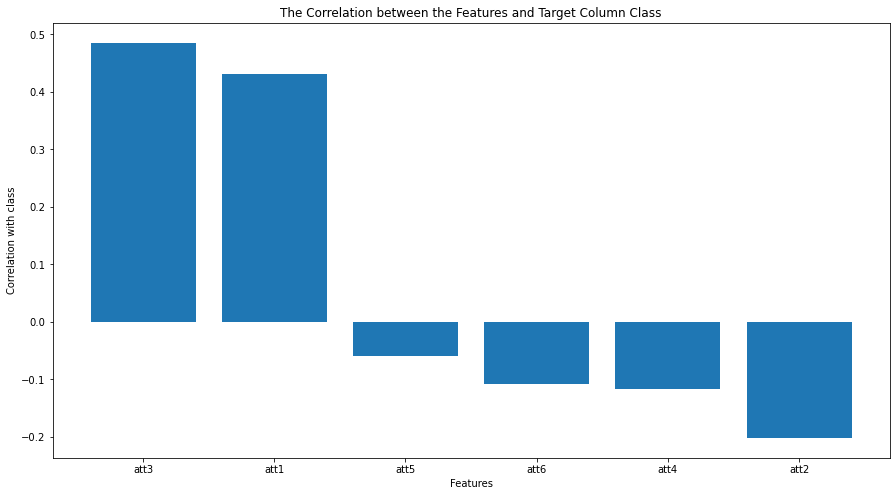

In [22]:
# correlation 
corr = pd.DataFrame(df.corr()['class'].sort_values(ascending=False)[1:])

labels = corr.index
corr_values = corr['class'].tolist()

plt.figure(figsize=(15, 8))
plt.bar(labels, corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with class')
plt.title('The Correlation between the Features and Target Column Class')
plt.show()

In [23]:
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42))
])

In [24]:
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [25]:
rf_pipe.score(x_valid, y_valid)

0.7075

### Modeling

In [26]:
# helper functions for RandomForests
# puts the feature importance of RandomForest in a DataFrame
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns[:-1], 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

# Plots the feature importance using the DataFrame
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [27]:
# fit_model
# takes a model and datasets as input and outputs the scores
def fit_model(model, x_train, y_train, x_valid, y_valid, return_scores=False):
    # fitting the model
    model.fit(x_train, y_train)
    
    # Scores
    train_score = model.score(x_train, y_train)
    y_pred = model.predict(x_valid)
    valid_score = accuracy_score(y_pred, y_valid)
    conf_mx = confusion_matrix(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average='weighted')
    recall = recall_score(y_valid, y_pred, average='weighted')
    f1 = f1_score(y_valid, y_pred, average='weighted')
    balanced = balanced_accuracy_score(y_valid, y_pred)

    if return_scores:
        return train_score, valid_score, balanced, precision, recall, f1
    
    print('----- Model Scores -----')
    print(f"train score: {train_score:.4f} | valid score: {valid_score:.4f}")
    print(f"precision  : {precision:.4f} | recall     : {recall:.4f}")
    print(f"f1 score   : {f1:.4f} | balanced   : {balanced:.4f}")
    plot_confusion_matrix(model, x_valid, y_valid,
                         values_format='')


    return model

### models 

----- Model Scores -----
train score: 0.9569 | valid score: 0.7075
precision  : 0.7117 | recall     : 0.7075
f1 score   : 0.7076 | balanced   : 0.6906


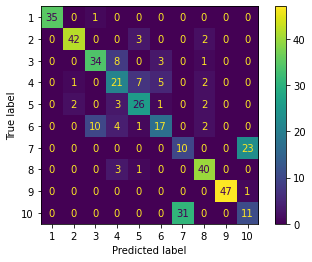

In [28]:
# rf
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42))
])
rf_pipe = fit_model(rf_pipe, x_train, y_train, x_valid, y_valid)

In [29]:
fi = rf_feat_importance(rf, df)
fi

,cols,imp
5,att6,0.271560
4,att5,0.190128
3,att4,0.183200
1,att2,0.136194
2,att3,0.121388
0,att1,0.097530


<AxesSubplot:ylabel='cols'>

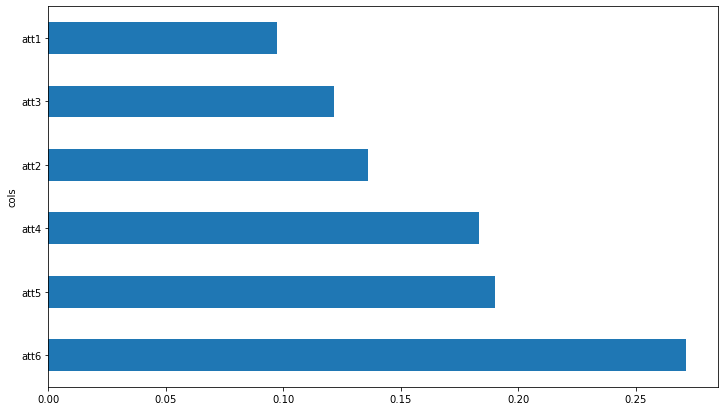

In [30]:
plot_fi(fi)

----- Model Scores -----
train score: 0.7312 | valid score: 0.7450
precision  : 0.7045 | recall     : 0.7450
f1 score   : 0.7128 | balanced   : 0.7418


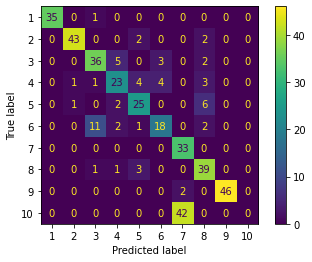

In [31]:
# SVM
svc_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc', SVC())
])
svc_pipe = fit_model(svc_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.8063 | valid score: 0.7350
precision  : 0.7420 | recall     : 0.7350
f1 score   : 0.7356 | balanced   : 0.7201


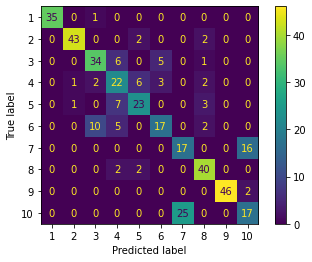

In [32]:
# KNN
knn_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_pipe = fit_model(knn_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7500 | valid score: 0.7500
precision  : 0.8146 | recall     : 0.7500
f1 score   : 0.7237 | balanced   : 0.7462


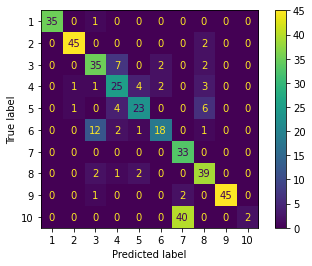

In [33]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

### Outlier detector 

In [34]:
x,y = df.iloc[:, :-1], df['class']

In [35]:
# detecting outliers using IsolationForest
outlierDetector =  IsolationForest(n_estimators=100,random_state = 42, contamination=0.1)
result = outlierDetector.fit_predict(x)
outliers = df[result==-1]

In [36]:
outliers.shape

(200, 7)

In [37]:
new_df = df.drop(outliers.index, axis=0)
x,y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7340 | valid score: 0.7389
precision  : 0.7282 | recall     : 0.7389
f1 score   : 0.7066 | balanced   : 0.7440


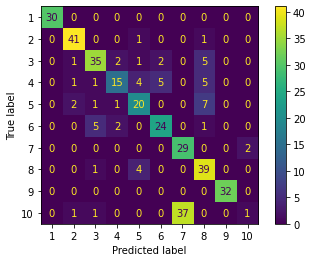

In [38]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [39]:
x,y = df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7500 | valid score: 0.7500
precision  : 0.8146 | recall     : 0.7500
f1 score   : 0.7237 | balanced   : 0.7462


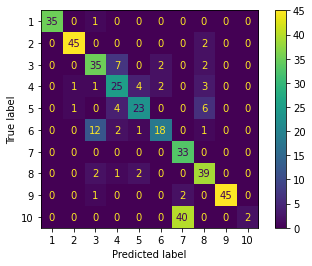

In [40]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

#### Removing some features 

In [41]:
# removing the feature with low importance based on Random Forest
new_df = df.drop('att3', axis=1)
x, y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7506 | valid score: 0.7500
precision  : 0.8128 | recall     : 0.7500
f1 score   : 0.7263 | balanced   : 0.7465


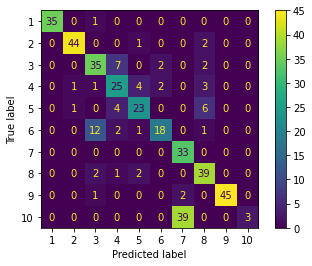

In [42]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [43]:
# removing the feature with least importance based on Random Forest
new_df = df.drop('att5', axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7188 | valid score: 0.7325
precision  : 0.7927 | recall     : 0.7325
f1 score   : 0.7119 | balanced   : 0.7307


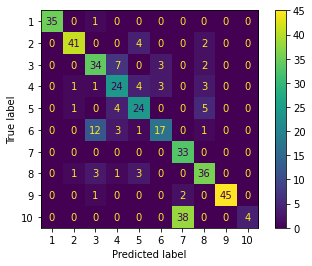

In [44]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [45]:
# removing the feature with least importance based on Random Forest
new_df = df.drop(['att5', 'att3'], axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7194 | valid score: 0.7325
precision  : 0.7927 | recall     : 0.7325
f1 score   : 0.7119 | balanced   : 0.7307


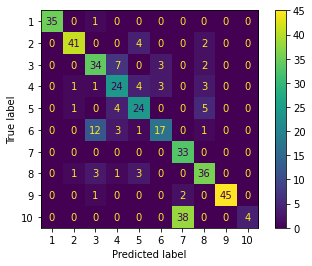

In [46]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [47]:
# removing the feature with least importance based on Random Forest
new_df = df.drop(['att6'], axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.6950 | valid score: 0.7250
precision  : 0.7885 | recall     : 0.7250
f1 score   : 0.6965 | balanced   : 0.7220


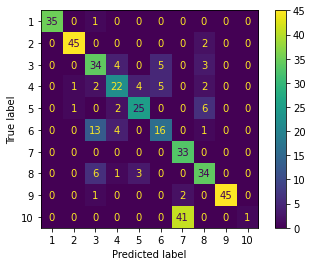

In [48]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

In [49]:
# removing the feature with least importance based on Random Forest
new_df = df.drop(['att1'], axis=1)
x, y = new_df.iloc[:, :-1], df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

----- Model Scores -----
train score: 0.7469 | valid score: 0.7475
precision  : 0.8124 | recall     : 0.7475
f1 score   : 0.7210 | balanced   : 0.7433


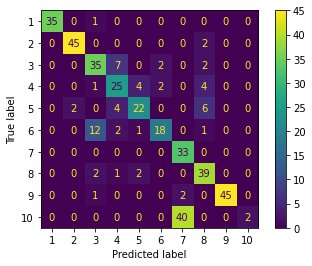

In [50]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])
lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

### New data without `att3` 

In [51]:
# removing the feature with least importance based on Random Forest
new_df = df.drop('att3', axis=1)
x, y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

lr_pipe.fit(x_train, y_train)

# KNN
knn_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_pipe.fit(x_train, y_train)

# SVM
svc_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc', SVC())
])

svc_pipe.fit(x_train, y_train)

# rf
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42))
])

rf_pipe.fit(x_train, y_train)

# models scores after removing att3
print('LR Accuracy: ', accuracy_score(y_valid, lr_pipe.predict(x_valid)))
print('KNN Accuracy: ', accuracy_score(y_valid, knn_pipe.predict(x_valid)))
print('SVC Accuracy: ', accuracy_score(y_valid, svc_pipe.predict(x_valid)))
print('RF Accuracy: ', accuracy_score(y_valid, rf_pipe.predict(x_valid)))

LR Accuracy:  0.75
KNN Accuracy:  0.745
SVC Accuracy:  0.7475
RF Accuracy:  0.7025


### PCA

----- Model Scores -----
train score: 0.6837 | valid score: 0.7150
precision  : 0.7267 | recall     : 0.7150
f1 score   : 0.6942 | balanced   : 0.7084


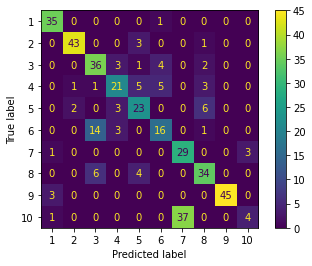

In [53]:
pca_pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(n_components=.95, whiten=True, random_state=42)),
  ('rf', LogisticRegression(random_state=42, n_jobs=-1))
])

pca_pipe = fit_model(pca_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.6869 | valid score: 0.7400
precision  : 0.7496 | recall     : 0.7400
f1 score   : 0.7287 | balanced   : 0.7328


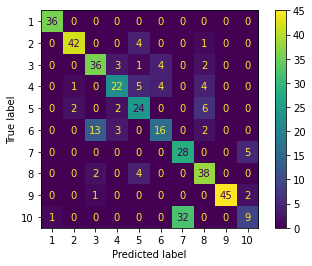

In [54]:
pca_pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', KernelPCA(n_components=4, kernel='poly', random_state=42)),
  ('rf', LogisticRegression(random_state=42, n_jobs=-1))
])

pca_pipe = fit_model(pca_pipe, x_train, y_train, x_valid, y_valid)

Using PCA didn't help 

### Using Kmeans 

----- Model Scores -----
train score: 0.6550 | valid score: 0.6725
precision  : 0.6516 | recall     : 0.6725
f1 score   : 0.6438 | balanced   : 0.6737


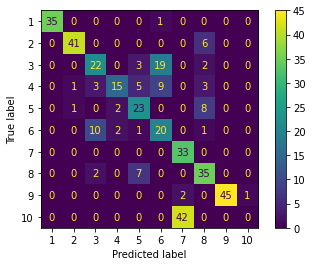

In [55]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=5)),
    ('svc', SVC())
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.6700 | valid score: 0.6975
precision  : 0.7141 | recall     : 0.6975
f1 score   : 0.6879 | balanced   : 0.6939


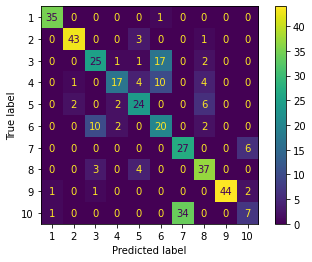

In [56]:
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5)),
    ('lr', LogisticRegression(random_state=42))
])

lr_pipe = fit_model(lr_pipe, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.9569 | valid score: 0.6525
precision  : 0.6605 | recall     : 0.6525
f1 score   : 0.6545 | balanced   : 0.6340


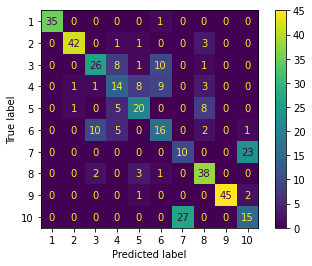

In [57]:
# rf
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5)),
    ('rf', RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42))
])

rf_pipe = fit_model(rf_pipe, x_train, y_train, x_valid, y_valid)

kmeans didn't help either 

# Finetune models  

In [58]:
# split the data
x, y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid , y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((1600, 5), (1600,)), ((400, 5), (400,)))

In [59]:
# RF
n_estimators = [int(x) for x in np.linspace(start=10, stop=150, num=10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.1s finished


----- Model Scores -----
train score: 0.8163 | valid score: 0.7250
precision  : 0.7247 | recall     : 0.7250
f1 score   : 0.7140 | balanced   : 0.7199


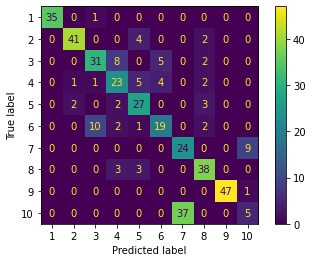

In [60]:
rf_pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('random_rf', RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42, n_jobs=-1), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])


rf_pipeline = fit_model(rf_pipeline, x_train, y_train, x_valid, y_valid)

In [61]:
rf_pipeline['random_rf'].best_params_

{'n_estimators': 134,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': False}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    7.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.2s finished


----- Model Scores -----
train score: 0.7825 | valid score: 0.7675
precision  : 0.7852 | recall     : 0.7675
f1 score   : 0.7586 | balanced   : 0.7604


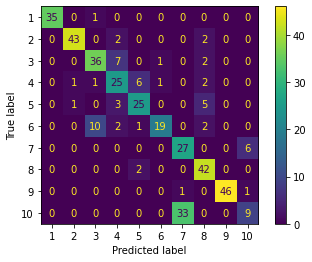

In [89]:
# SVC
param_grid = {'C': np.arange(1, 11), 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly', 'sigmoid', 'linear', 'sigmoid']}

svc_pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('random_svc', RandomizedSearchCV(estimator = SVC(probability=True), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])


svc_pipeline = fit_model(svc_pipeline, x_train, y_train, x_valid, y_valid)

In [90]:
svc_pipeline['random_svc'].best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 5}

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  57 out of  72 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    0.4s finished


----- Model Scores -----
train score: 0.8087 | valid score: 0.7250
precision  : 0.7240 | recall     : 0.7250
f1 score   : 0.7122 | balanced   : 0.7142


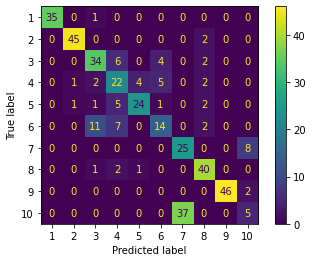

In [64]:
# KNN
param_grid = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree']}

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_knn', RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])    

knn_pipeline = fit_model(knn_pipeline, x_train, y_train, x_valid, y_valid)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  42 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.4s finished


----- Model Scores -----
train score: 0.7506 | valid score: 0.7500
precision  : 0.8128 | recall     : 0.7500
f1 score   : 0.7263 | balanced   : 0.7465


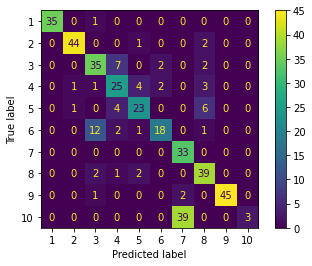

In [65]:
# LR
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_lr', RandomizedSearchCV(estimator = LogisticRegression(random_state=42, n_jobs=-1), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])    


lr_pipeline = fit_model(lr_pipeline, x_train, y_train, x_valid, y_valid)

- [ ] put a table of the results

In [73]:
# retrain models with the best parameters
print('Training SVC....')
# SVM
svc_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc', SVC(**svc_pipeline['random_svc'].best_params_, probability=True))
])
svc_pipe.fit(x_train, y_train)


print('Training RF...')
# rf
rf_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf', RandomForestClassifier(**rf_pipeline['random_rf'].best_params_, n_jobs=-1, random_state=42))
])
rf_pipe.fit(x_train, y_train)

print('Training KNN...')
# KNN
knn_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(**knn_pipeline['random_knn'].best_params_))
])
knn_pipe.fit(x_train, y_train)

print('Training LR......')
# LR
lr_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lr', LogisticRegression(**lr_pipeline['random_lr'].best_params_, random_state=42))
])
lr_pipe.fit(x_train, y_train)

Training SVC....
Training RF...
Training KNN...
Training LR......


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])

In [75]:
# models scores with the best params 
print('SVC Accuracy: ', accuracy_score(y_valid, svc_pipe.predict(x_valid)))
print('LR Accuracy: ', accuracy_score(y_valid, lr_pipe.predict(x_valid)))
print('KNN Accuracy: ', accuracy_score(y_valid, knn_pipe.predict(x_valid)))
print('RF Accuracy: ', accuracy_score(y_valid, rf_pipe.predict(x_valid)))

SVC Accuracy:  0.7675
LR Accuracy:  0.75
KNN Accuracy:  0.725
RF Accuracy:  0.725


In [79]:
# only getting the models with their best parameters instead of the whole pipeline
svc = SVC(**svc_pipeline['random_svc'].best_params_, probability=True)
rf  = RandomForestClassifier(**rf_pipeline['random_rf'].best_params_, n_jobs=-1, random_state=42)
knn = KNeighborsClassifier(**knn_pipeline['random_knn'].best_params_)
lr  = LogisticRegression(**lr_pipeline['random_lr'].best_params_, random_state=42)

----- Model Scores -----
train score: 0.7837 | valid score: 0.7600
precision  : 0.7870 | recall     : 0.7600
f1 score   : 0.7385 | balanced   : 0.7558


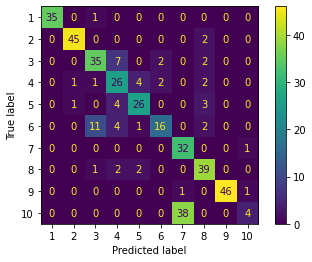

In [81]:
voting_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('voter', VotingClassifier(
        estimators=[('RF', rf), ('KNN', knn), ('SVC', svc), ('LR', lr)],
        voting='hard'))
])

voting_pipeline = fit_model(voting_pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.8187 | valid score: 0.7500
precision  : 0.7539 | recall     : 0.7500
f1 score   : 0.7426 | balanced   : 0.7412


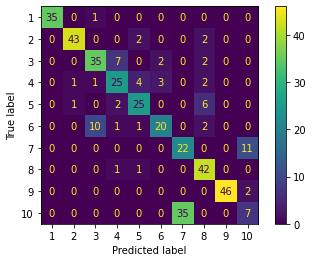

In [82]:
voting_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('voter', VotingClassifier(
        estimators=[('RF', rf), ('KNN', knn), ('SVC', svc), ('LR', lr)],
        voting='soft'))
])

voting_pipeline = fit_model(voting_pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7769 | valid score: 0.7575
precision  : 0.7844 | recall     : 0.7575
f1 score   : 0.7361 | balanced   : 0.7521


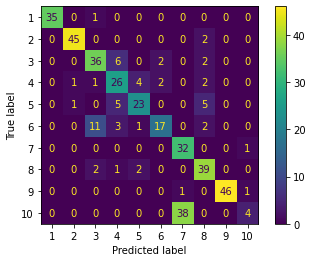

In [83]:
# drop the rf classifier
voting_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('voter', VotingClassifier(
        estimators=[('KNN', knn), ('SVC', svc), ('LR', lr)],
        voting='hard'))
])

voting_pipeline = fit_model(voting_pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7975 | valid score: 0.7475
precision  : 0.7532 | recall     : 0.7475
f1 score   : 0.7384 | balanced   : 0.7383


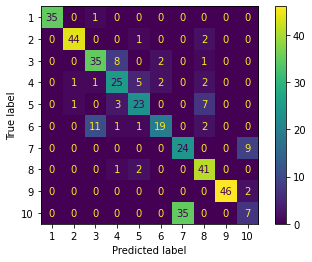

In [84]:
# drop the rf classifier
voting_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('voter', VotingClassifier(
        estimators=[('KNN', knn), ('SVC', svc), ('LR', lr)],
        voting='soft'))
])

voting_pipeline = fit_model(voting_pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7662 | valid score: 0.7575
precision  : 0.8279 | recall     : 0.7575
f1 score   : 0.7310 | balanced   : 0.7540


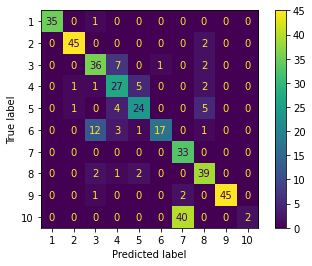

In [85]:
# drop the rf and knn 
voting_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('voter', VotingClassifier(
        estimators=[('SVC', svc), ('LR', lr)],
        voting='hard'))
])

voting_pipeline = fit_model(voting_pipeline, x_train, y_train, x_valid, y_valid)

----- Model Scores -----
train score: 0.7544 | valid score: 0.7850
precision  : 0.7975 | recall     : 0.7850
f1 score   : 0.7845 | balanced   : 0.7737


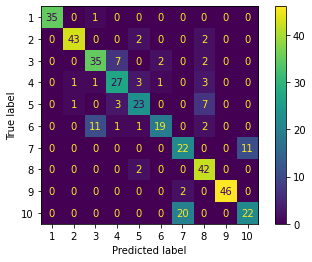

In [86]:
# drop the rf and knn 
voting_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('voter', VotingClassifier(
        estimators=[('SVC', svc), ('LR', lr)],
        voting='soft'))
])

voting_pipeline = fit_model(voting_pipeline, x_train, y_train, x_valid, y_valid)

### Working more on the SVC 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    8.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.3s finished


----- Model Scores -----
train score: 0.7856 | valid score: 0.7675
precision  : 0.7757 | recall     : 0.7675
f1 score   : 0.7654 | balanced   : 0.7491


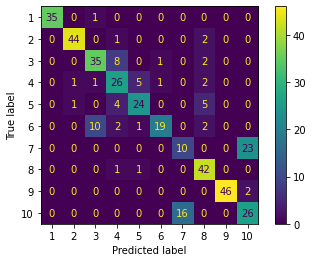

In [113]:
# SVC
param_grid = {'C': np.arange(1, 11), 'gamma': [1,0.1,0.01,0.001, 'scale'],'kernel': ['poly', 'sigmoid', 'linear', 'sigmoid'],
              'class_weight': [None, 'balanced']}

svc_pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('random_svc', RandomizedSearchCV(estimator = SVC(probability=True), param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1))
])


svc_pipeline = fit_model(svc_pipeline, x_train, y_train, x_valid, y_valid)

In [114]:
svc_pipeline['random_svc'].best_params_

{'kernel': 'poly', 'gamma': 1, 'class_weight': 'balanced', 'C': 4}

#### Different class weights

In [115]:
svc_pipeline['random_svc'].best_params_.pop('class_weight')

'balanced'

In [116]:
svc_pipeline['random_svc'].best_params_

{'kernel': 'poly', 'gamma': 1, 'C': 4}

----- Model Scores -----
train score: 0.7769 | valid score: 0.7775
precision  : 0.7624 | recall     : 0.7775
f1 score   : 0.7559 | balanced   : 0.7526


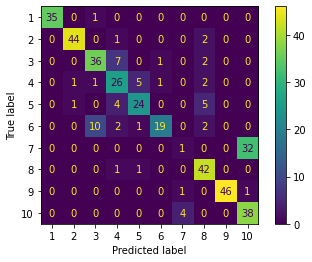

In [118]:
# SVM
svc_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svc', SVC(**svc_pipeline['random_svc'].best_params_, class_weight={10:7, 7:5}, probability=True))
])
svc_pipe = fit_model(svc_pipe, x_train, y_train, x_valid, y_valid)

### Bagging and Pasting using the best model 

In [ ]:
bag_clf = BaggingClassifier(SVC(**svc_random.best_params_, probability=True), n_estimators=150, 
                           max_samples=1000, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_valid, y_valid)

In [ ]:
bag_clf = BaggingClassifier(SVC(**svc_random.best_params_, probability=True), n_estimators=150, 
                           max_samples=1000, max_features=3, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_valid, y_valid)

In [ ]:
bag_clf = BaggingClassifier(SVC(**svc_random.best_params_, probability=True), n_estimators=150, 
                           max_samples=1000, bootstrap=False, random_state=42, n_jobs=-1)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_valid, y_valid)

**best results**

### bias & Variance

In [ ]:
svc_random.best_params_

In [ ]:
svc_grid = SVC(gamma=1, C=5)
svc_param = {'kernel': ['sigmoid', 'poly', 'linear', 'rbf']}
svc_grid = GridSearchCV(svc_grid, svc_param, n_jobs=-1, verbose=2, cv=3)
svc_grid.fit(x_train, y_train)

In [ ]:
svc_grid.best_params_

In [ ]:
svc_grid.score(x_valid, y_valid)

In [ ]:
svc_results = pd.DataFrame(svc_grid.cv_results_);
svc_results

In [ ]:
svc_results.plot(kind='bar', x='param_kernel', y='mean_test_score')
plt.ylim(0.74, 0.76)
plt.show()
for i in range(4):
    print(f"Kernel {svc_results['param_kernel'][i]} : {svc_results['mean_test_score'][i]}")

The sigmoid kernel has a really high bias as it made wrong assumption about the data and it is really underfitting.

For the rest of the kernels they are producing similar results

In [ ]:
svc_grid = SVC(gamma=1, kernel='poly',C=10)
svc_param = {'C': np.arange(1, 35)}
svc_grid = GridSearchCV(svc_grid, svc_param, n_jobs=-1, verbose=2, cv=3)
svc_grid.fit(x_train, y_train)

In [ ]:
svc_grid.best_params_

In [ ]:
svc_results = pd.DataFrame(svc_grid.cv_results_); svc_results.head()

In [ ]:
plt.figure(figsize=(10, 25))
svc_results.plot(kind='bar', x='param_C', y='mean_test_score', figsize=(10, 15))
plt.ylim(0.73, 0.76)

At small regularization C values the the variance of the model was high and it was sensitive to small variations in the data and this variance decreased as we increased the value of C until it reached a specific point at c=5 and where the bias started to increase as the model generalized and decrease the model complexity too much and ignored more points which made it have wrong assumptions about the data. 

###  Pipelines

In [ ]:
df.columns

In [ ]:
# new data without the att3
new_df = df.drop('att3', axis=1)
x, y = new_df.iloc[:, :-1], new_df['class']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters=5)),
    ('svc', SVC(kernel='poly', gamma=1, C=10))
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**svc_random.best_params_))
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(**svc_random.best_params_))
])

pipeline = fit_model(pipeline, x_train, y_train, x_valid, y_valid)